<a href="https://colab.research.google.com/github/Chinmaya54/CP_02_T16_MineCrafters/blob/Asish/Data_Mining_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/cleaned_data1.csv")

In [ ]:
import pandas as pd

# Load your dataset into a pandas DataFrame (replace 'your_dataset.csv' with your actual dataset file)
#df = pd.read_csv('your_dataset.csv')

# Drop the columns that have been removed
#columns_to_drop = ['id', 'illustrations-note', 'image-checksum', 'image-path', 'image-url', 'index-date', 'isbn10', 'isbn13', 'url', 'publication-place']
#df = df.drop(columns=columns_to_drop)

# Handle missing data (for the columns not dropped)
# Here, we'll use simple imputation by filling missing values in numeric columns with their means,
# and missing values in categorical columns with a placeholder value, such as 'Unknown'.
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Verify that missing data has been handled
print(df.isnull().sum())

# The DataFrame 'df' now contains your dataset with missing data handled.


authors                  0
bestsellers-rank         0
categories               0
description              0
dimension-x              0
dimension-y              0
dimension-z              0
edition                  0
edition-statement        0
for-ages                 0
format                   0
imprint                  0
lang                     0
publication-date         0
publication-place    27329
rating-avg               0
rating-count             0
title                    0
weight                   0
dtype: int64


In [ ]:
unique_values = df['lang'].unique()
print(unique_values)


['en' 'es' 'Unknown' 'it' 'de' 'pl' 'pt' 'fr' 'hi' 'ja' 'mul' 'ca' 'nl'
 'lv' 'ru' 'ml' 'af' 'da' 'ms' 'ar' 'el' 'la' 'sv' 'yo' 'id' 'tl' 'fa'
 'zxx' 'cy' 'cr' 'zh' 'ro']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the unique values in 'lang' and transform the column
df['lang_encoded'] = label_encoder.fit_transform(df['lang'])


In [ ]:
df['lang_encoded']

0         8
1         8
2         9
3         8
4         8
         ..
27324     8
27325     8
27326     8
27327     8
27328    31
Name: lang_encoded, Length: 27329, dtype: int64

In [ ]:
df['weight']=df['weight']//100

In [ ]:
df

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,imprint,lang,publication-date,publication-place,rating-avg,rating-count,title,weight,lang_encoded
0,1,49848.0,"214, 220, 237, 2646, 2647, 2659, 2660, 2679",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.00,Unknown,Unknown,Unknown,1.0,Mainstream Publishing,en,14-10-2004 00:00,NaN,4.03000,292.000000,Soldier Five : The Real Truth About The Bravo ...,2.0,9
1,"2, 3",115215.0,"235, 3386",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.40,Unknown,Unknown,Unknown,1.0,Unknown,en,13-03-2009 00:00,NaN,3.60000,335.000000,Underbelly : The Gangland War,2.0,9
2,4,11732.0,"358, 2630, 360, 2632",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.00,New edition,Unknown,Unknown,1.0,Unknown,es,30-04-2020 00:00,NaN,3.88000,37211.000000,"A Sir Phillip, Con Amor",3.0,10
3,"5, 6, 7, 8",114379.0,"377, 2978, 2980",The Third Book of General Ignorance gathers t...,153.0,234.0,24.00,Unknown,Export - Airside ed,Unknown,1.0,Unknown,en,01-10-2015 00:00,NaN,4.17000,384.000000,QI: The Third Book of General Ignorance,4.0,9
4,9,98413.0,"2813, 2980",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.00,Unknown,Unknown,Unknown,2.0,HarperCollins Publishers Ltd,en,18-06-2019 00:00,NaN,3.90000,5095.000000,The Hidden Power of F*cking Up,9.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27324,28253,701883.0,"163, 3278, 2649, 1530",This volume explores the development of the ea...,156.0,235.0,20.83,New edition,New edition,Unknown,1.0,Unknown,en,30-09-2002 00:00,NaN,3.87000,92.000000,The Circus Age : Culture and Society under the...,5.0,9
27325,28254,926336.0,"1532, 1562",To those of us who are not mathematicians or p...,152.0,229.0,13.00,Unknown,Unknown,Unknown,1.0,Unknown,en,01-03-2011 00:00,NaN,4.25000,40.000000,Relativity for the Questioning Mind,2.0,9
27326,28255,741018.0,"1530, 1531, 1719, 1755, 1766","Like many apparently simple devices, the verti...",152.0,229.0,27.43,Unknown,Revised ed.,Unknown,1.0,Unknown,en,01-01-2003 00:00,NaN,4.00000,3.000000,Stronger than a Hundred Men : A History of the...,6.0,9
27327,28256,934272.0,"1520, 1521",Debate over the nature of science has recently...,153.0,227.0,21.00,New edition,New edition,Unknown,1.0,University of Chicago Press,en,15-05-1990 00:00,NaN,3.94000,16.000000,Explaining Science : A Cognitive Approach,5.0,9


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the "bestsellers-rank" column
df['bestsellers-rank'] = scaler.fit_transform(df[['bestsellers-rank']])

# Apply Min-Max scaling to the dimensions columns
dimensions = ['dimension-x', 'dimension-y', 'dimension-z']
df[dimensions] = scaler.fit_transform(df[dimensions])


In [ ]:
df

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,imprint,lang,publication-date,publication-place,rating-avg,rating-count,title,weight,lang_encoded,bestsellers-rank_scaled
0,1,0.013285,"214, 220, 237, 2646, 2647, 2659, 2660, 2679",SOLDIER FIVE is an elite soldier's explosive m...,0.099302,0.099545,0.029890,Unknown,Unknown,Unknown,...,Mainstream Publishing,en,14-10-2004 00:00,NaN,4.03000,292.000000,Soldier Five : The Real Truth About The Bravo ...,2.0,9,0.013285
1,"2, 3",0.031181,"235, 3386",John Moran and Carl Williams were the two bigg...,0.097750,0.102173,0.038063,Unknown,Unknown,Unknown,...,Unknown,en,13-03-2009 00:00,NaN,3.60000,335.000000,Underbelly : The Gangland War,2.0,9,0.031181
2,4,0.002850,"358, 2630, 360, 2632",Sir Phillip knew that Eloise Bridgerton was a ...,0.115593,0.112683,0.041998,New edition,Unknown,Unknown,...,Unknown,es,30-04-2020 00:00,NaN,3.88000,37211.000000,"A Sir Phillip, Con Amor",3.0,10,0.002850
3,"5, 6, 7, 8",0.030952,"377, 2978, 2980",The Third Book of General Ignorance gathers t...,0.117921,0.117736,0.035944,Unknown,Export - Airside ed,Unknown,...,Unknown,en,01-10-2015 00:00,NaN,4.17000,384.000000,QI: The Third Book of General Ignorance,4.0,9,0.030952
4,9,0.026581,"2813, 2980",The Try Guys deliver their first book-an inspi...,0.147401,0.120768,0.043511,Unknown,Unknown,Unknown,...,HarperCollins Publishers Ltd,en,18-06-2019 00:00,NaN,3.90000,5095.000000,The Hidden Power of F*cking Up,9.0,9,0.026581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27324,28253,0.191795,"163, 3278, 2649, 1530",This volume explores the development of the ea...,0.120248,0.118242,0.031146,New edition,New edition,Unknown,...,Unknown,en,30-09-2002 00:00,NaN,3.87000,92.000000,The Circus Age : Culture and Society under the...,5.0,9,0.191795
27325,28254,0.253244,"1532, 1562",To those of us who are not mathematicians or p...,0.117145,0.115210,0.019296,Unknown,Unknown,Unknown,...,Unknown,en,01-03-2011 00:00,NaN,4.25000,40.000000,Relativity for the Questioning Mind,2.0,9,0.253244
27326,28255,0.202509,"1530, 1531, 1719, 1755, 1766","Like many apparently simple devices, the verti...",0.117145,0.115210,0.041135,Unknown,Revised ed.,Unknown,...,Unknown,en,01-01-2003 00:00,NaN,4.00000,3.000000,Stronger than a Hundred Men : A History of the...,6.0,9,0.202509
27327,28256,0.255417,"1520, 1521",Debate over the nature of science has recently...,0.117921,0.114199,0.031404,New edition,New edition,Unknown,...,University of Chicago Press,en,15-05-1990 00:00,NaN,3.94000,16.000000,Explaining Science : A Cognitive Approach,5.0,9,0.255417


In [ ]:
import pandas as pd
from scipy import stats

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Define the column to test for outliers
column_name = 'bestsellers-rank'

# Calculate the Z-scores
z_scores = stats.zscore(df[column_name])

# Set a Z-score threshold for outlier detection (e.g., 2.0)
z_score_threshold = 2.0

# Create a new column to mark outliers
df['is_outlier'] = (abs(z_scores) > z_score_threshold).astype(int)

# Display rows where 'is_outlier' is 1 (outliers)
outliers = df[df['is_outlier'] == 1]
print(outliers)

# Now you can decide how to handle these outliers (e.g., remove or transform)


                   authors  bestsellers-rank  \
22                      33          0.661569   
25                      36          0.743745   
27          38, 26, 39, 40          0.873092   
54                 Unknown          0.743865   
65          87, 25, 88, 27          0.922068   
...                    ...               ...   
27295         28219, 28220          0.696478   
27296  28221, 28222, 28223          0.663935   
27297  28224, 28225, 28226          0.663933   
27301         25133, 25132          0.665519   
27302                28230          0.665496   

                                              categories  \
22                                 334, 2791, 2978, 2980   
25                                            2980, 2983   
27                       143, 3258, 146, 3261, 334, 2980   
54                                                  2980   
65                                                  2980   
...                                                  ...   
272

<ipython-input-85-0e827a516e74>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corrwith(df['rating-avg'])


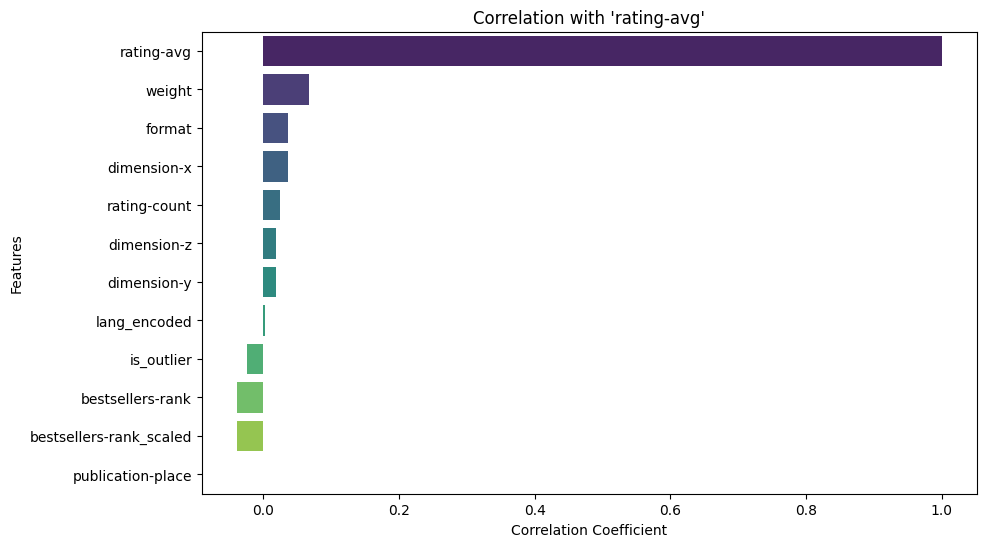

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Calculate the Pearson correlation coefficients between all features and the target variable
correlations = df.corrwith(df['rating-avg'])

# Sort the correlations in descending order
correlations = correlations.sort_values(ascending=False)

# Create a bar plot to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations, y=correlations.index, palette="viridis")
plt.title("Correlation with 'rating-avg'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()


<ipython-input-86-6834d6ab63b8>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corrwith(df['rating-avg'])


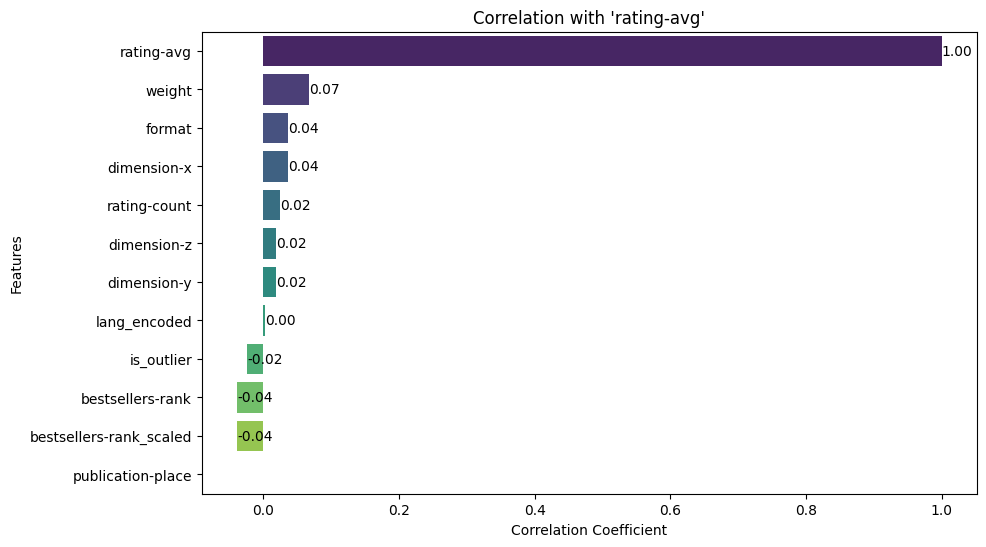

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Calculate the Pearson correlation coefficients between all features and the target variable
correlations = df.corrwith(df['rating-avg'])

# Sort the correlations in descending order
correlations = correlations.sort_values(ascending=False)

# Create a bar plot to visualize the correlations with numbers
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=correlations, y=correlations.index, palette="viridis")
plt.title("Correlation with 'rating-avg'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")

# Annotate the bar plot with correlation values
for i, v in enumerate(correlations):
    plt.text(v, i, f"{v:.2f}", color='black', va='center')

plt.show()


In [ ]:
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Create a new DataFrame by splitting the 'authors' column
authors_df = df['authors'].str.split(',').explode().reset_index(drop=True)

# Create a new column to indicate the source of the data
authors_df['source'] = 'authors'

# Handle missing values if needed

# Concatenate the 'authors' DataFrame with the original DataFrame
df = pd.concat([df, authors_df], axis=1)


In [ ]:
df

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,publication-date,publication-place,rating-avg,rating-count,title,weight,lang_encoded,bestsellers-rank_scaled,is_outlier,authors
0,1,0.013285,"214, 220, 237, 2646, 2647, 2659, 2660, 2679",SOLDIER FIVE is an elite soldier's explosive m...,0.099302,0.099545,0.029890,Unknown,Unknown,Unknown,...,14-10-2004 00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,2.0,9.0,0.013285,0.0,1
1,"2, 3",0.031181,"235, 3386",John Moran and Carl Williams were the two bigg...,0.097750,0.102173,0.038063,Unknown,Unknown,Unknown,...,13-03-2009 00:00,NaN,3.60,335.0,Underbelly : The Gangland War,2.0,9.0,0.031181,0.0,2
2,4,0.002850,"358, 2630, 360, 2632",Sir Phillip knew that Eloise Bridgerton was a ...,0.115593,0.112683,0.041998,New edition,Unknown,Unknown,...,30-04-2020 00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",3.0,10.0,0.002850,0.0,3
3,"5, 6, 7, 8",0.030952,"377, 2978, 2980",The Third Book of General Ignorance gathers t...,0.117921,0.117736,0.035944,Unknown,Export - Airside ed,Unknown,...,01-10-2015 00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,4.0,9.0,0.030952,0.0,4
4,9,0.026581,"2813, 2980",The Try Guys deliver their first book-an inspi...,0.147401,0.120768,0.043511,Unknown,Unknown,Unknown,...,18-06-2019 00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,9.0,9.0,0.026581,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28254
37116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28255
37117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28256
37118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28257


In [ ]:
X = df.drop(columns=['rating-avg','authors'])

In [ ]:
X

,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,imprint,lang,publication-date,publication-place,rating-count,title,weight,lang_encoded,bestsellers-rank_scaled,is_outlier
0,0.013285,"214, 220, 237, 2646, 2647, 2659, 2660, 2679",SOLDIER FIVE is an elite soldier's explosive m...,0.099302,0.099545,0.029890,Unknown,Unknown,Unknown,1.0,Mainstream Publishing,en,14-10-2004 00:00,NaN,292.0,Soldier Five : The Real Truth About The Bravo ...,2.0,9.0,0.013285,0.0
1,0.031181,"235, 3386",John Moran and Carl Williams were the two bigg...,0.097750,0.102173,0.038063,Unknown,Unknown,Unknown,1.0,Unknown,en,13-03-2009 00:00,NaN,335.0,Underbelly : The Gangland War,2.0,9.0,0.031181,0.0
2,0.002850,"358, 2630, 360, 2632",Sir Phillip knew that Eloise Bridgerton was a ...,0.115593,0.112683,0.041998,New edition,Unknown,Unknown,1.0,Unknown,es,30-04-2020 00:00,NaN,37211.0,"A Sir Phillip, Con Amor",3.0,10.0,0.002850,0.0
3,0.030952,"377, 2978, 2980",The Third Book of General Ignorance gathers t...,0.117921,0.117736,0.035944,Unknown,Export - Airside ed,Unknown,1.0,Unknown,en,01-10-2015 00:00,NaN,384.0,QI: The Third Book of General Ignorance,4.0,9.0,0.030952,0.0
4,0.026581,"2813, 2980",The Try Guys deliver their first book-an inspi...,0.147401,0.120768,0.043511,Unknown,Unknown,Unknown,2.0,HarperCollins Publishers Ltd,en,18-06-2019 00:00,NaN,5095.0,The Hidden Power of F*cking Up,9.0,9.0,0.026581,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Separate the features and the target variable
X = df.drop(columns=['rating-avg','authors','categories','description','edition','for-ages','lang','publication-date','edition-statement','imprint','title'])
y = df['rating-avg']

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Separate the features and the target variable
X = df.drop(columns=['rating-avg','authors','categories','description','edition','for-ages','lang','publication-date','edition-statement','imprint','title'])

y = df['rating-avg']

# Handle missing values in the target variable (y) using mean imputation
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape y for imputation

# Create a Random Forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the data
regressor.fit(X, y_imputed)

# Get feature importances
importances = regressor.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
#feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance from Random Forest (Regression)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Assuming you have loaded your dataset into a DataFrame called 'df'
X = df.drop(columns=['rating-avg','authors','categories','description','edition','for-ages','lang','publication-date','edition-statement','imprint','title'])

y = df['rating-avg']

# Handle missing values in both X and y
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Reshape y and ravel it

# Create a Random Forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the data
regressor.fit(X_imputed, y_imputed)

# Get feature importances
importances = regressor.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance from Random Forest (Regression)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


ValueError: ignored

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Separate the features and the target variable
X = df.drop(columns=['rating-avg','authors','categories','description','edition','for-ages','lang','publication-date','edition-statement','imprint','title'])

y = df['rating-avg']

# Handle missing values in both X and y
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Reshape y and ravel it

# Choose a machine learning model (Random Forest in this example)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create an RFE selector with the model and the desired number of features
num_features_to_select = 10  # Adjust this to your desired number
if num_features_to_select <= X_imputed.shape[1]:  # Ensure it's not greater than the available features
    rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

    # Fit the RFE selector to the data
    rfe.fit(X_imputed, y_imputed)

    # Get the selected features
    selected_features = X.columns[rfe.support_]

    # Now, 'selected_features' contains the names of the features that RFE has selected
else:
    print("The number of features to select exceeds the available features in the dataset.")


IndexError: ignored

In [ ]:
unique_values = df['categories'].unique()
print(unique_values)


['214, 220, 237, 2646, 2647, 2659, 2660, 2679' '235, 3386'
 '358, 2630, 360, 2632' ... '1530, 1531, 1719, 1755, 1766'
 '386, 3388, 1520, 1667, 1682, 1683' nan]


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
#df = pd.read_csv('your_dataset.csv')

# Set a default integer index
df.reset_index(drop=True, inplace=True)

# Set the name of the index column to "index"
df.index.name = 'index'

# Display the DataFrame with the default integer index and the "index" column name
print(df)


          authors  bestsellers-rank  \
index                                 
0               1          0.013285   
1            2, 3          0.031181   
2               4          0.002850   
3      5, 6, 7, 8          0.030952   
4               9          0.026581   
...           ...               ...   
37115         NaN               NaN   
37116         NaN               NaN   
37117         NaN               NaN   
37118         NaN               NaN   
37119         NaN               NaN   

                                        categories  \
index                                                
0      214, 220, 237, 2646, 2647, 2659, 2660, 2679   
1                                        235, 3386   
2                             358, 2630, 360, 2632   
3                                  377, 2978, 2980   
4                                       2813, 2980   
...                                            ...   
37115                                          NaN   
37116 

In [ ]:
df

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,publication-date,publication-place,rating-avg,rating-count,title,weight,lang_encoded,bestsellers-rank_scaled,is_outlier,authors
index,,,,,,,,,,,,,,,,,,,,,
0,1,0.013285,"214, 220, 237, 2646, 2647, 2659, 2660, 2679",SOLDIER FIVE is an elite soldier's explosive m...,0.099302,0.099545,0.029890,Unknown,Unknown,Unknown,...,14-10-2004 00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,2.0,9.0,0.013285,0.0,1
1,"2, 3",0.031181,"235, 3386",John Moran and Carl Williams were the two bigg...,0.097750,0.102173,0.038063,Unknown,Unknown,Unknown,...,13-03-2009 00:00,NaN,3.60,335.0,Underbelly : The Gangland War,2.0,9.0,0.031181,0.0,2
2,4,0.002850,"358, 2630, 360, 2632",Sir Phillip knew that Eloise Bridgerton was a ...,0.115593,0.112683,0.041998,New edition,Unknown,Unknown,...,30-04-2020 00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",3.0,10.0,0.002850,0.0,3
3,"5, 6, 7, 8",0.030952,"377, 2978, 2980",The Third Book of General Ignorance gathers t...,0.117921,0.117736,0.035944,Unknown,Export - Airside ed,Unknown,...,01-10-2015 00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,4.0,9.0,0.030952,0.0,4
4,9,0.026581,"2813, 2980",The Try Guys deliver their first book-an inspi...,0.147401,0.120768,0.043511,Unknown,Unknown,Unknown,...,18-06-2019 00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,9.0,9.0,0.026581,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28254
37116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28255
37117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28256


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
#df = pd.read_csv('your_dataset.csv')

# Specify the two columns for which you want to calculate the correlation
column1 = 'index'  # Replace with the actual column name
column2 = 'authors'  # Replace with the actual column name

# Calculate the correlation between the two columns
correlation = df[index].corr(df[column2])

# Print the correlation value
print(f'Correlation between {column1} and {column2}: {correlation}')


NameError: ignored